# TASK 4 : SALES PREDICTION USING PYTHON

#Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

#Load and Inspecting the data

In [ ]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#Visualize and exploring the data

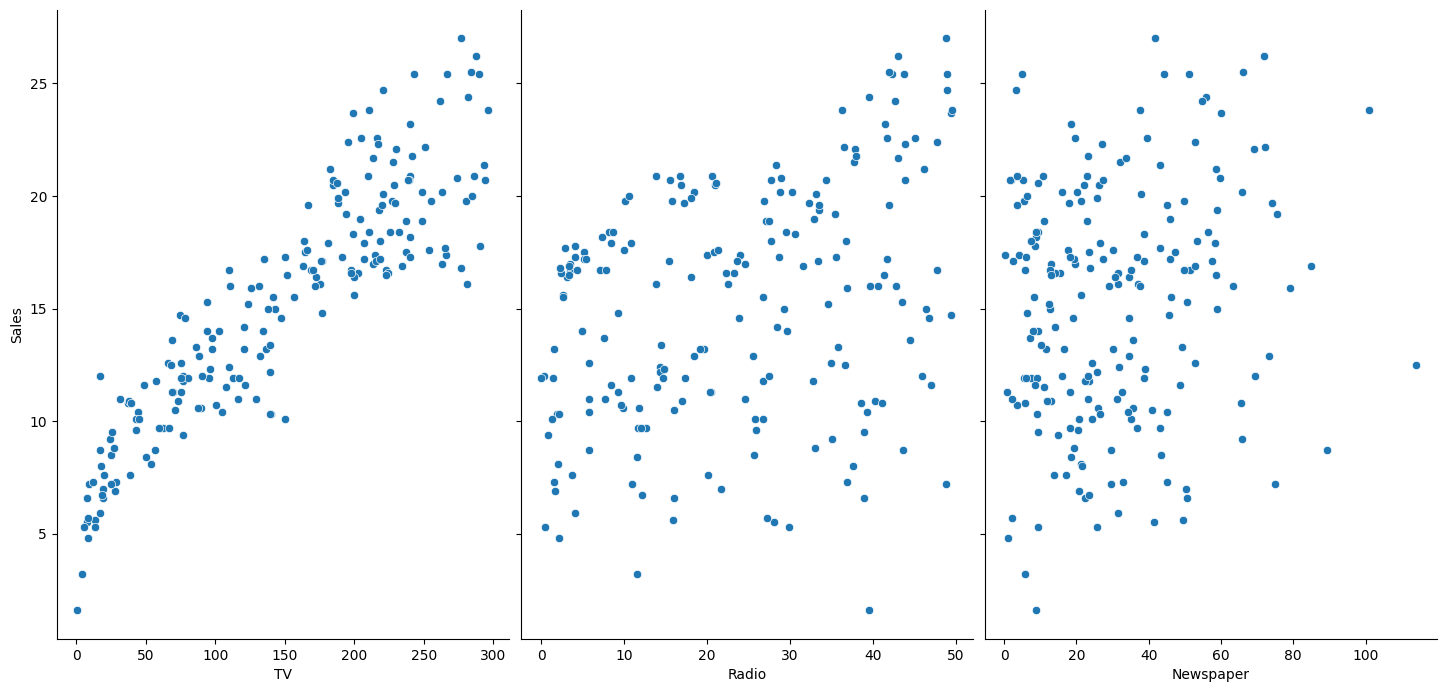

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7)

# Split the dataset into training and testing sets

In [ ]:
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

#Build the Model

In [ ]:
lr = sm.OLS(y_train, sm.add_constant(x_train)).fit()

#Model Evalution

In [ ]:
y_pred = lr.predict(sm.add_constant(x_test))

#Calculate the MSE of the Model

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r_squared = metrics.r2_score(y_test, y_pred)
print('Mean_Squared_Erro : ', mse)
print('r_square_value : ', r_squared)

Mean_Squared_Erro :  2.6360765623280806
r_square_value :  0.8655979373420264


# Visualizing the fit on the test set

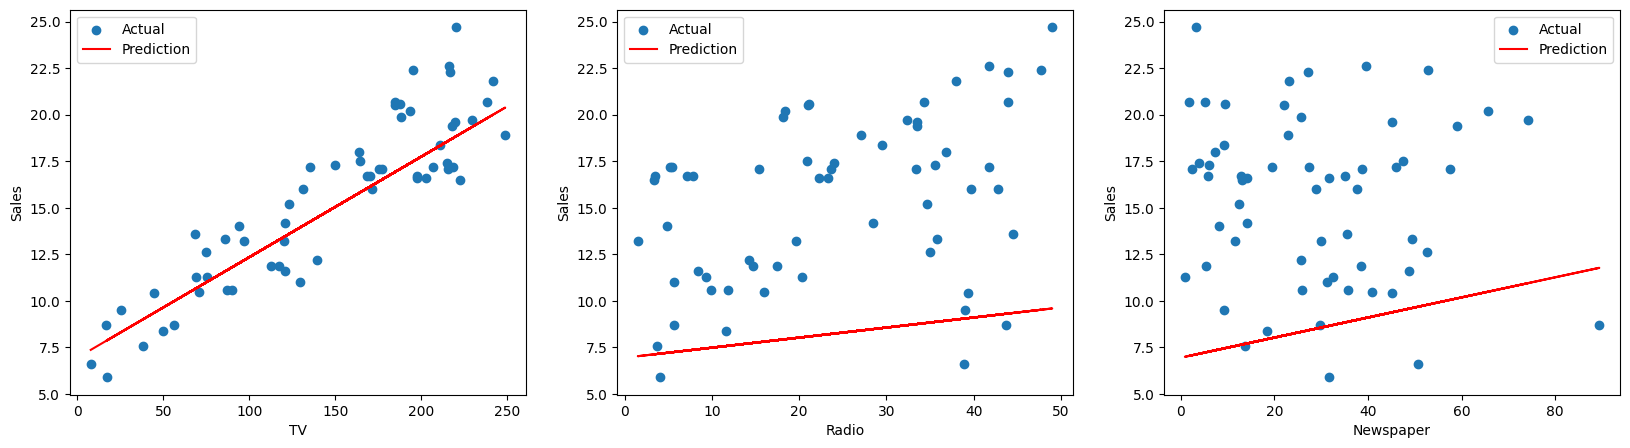

In [ ]:
plt.figure(figsize=(20, 5))
features=['TV','Radio','Newspaper']
for i, feature in enumerate(features):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_test[feature], y_test, label='Actual')
  plt.plot(x_test[feature], 6.948 + 0.054 *x_test[feature],'r', label='Prediction')
  plt.xlabel(feature)
  plt.ylabel('Sales')
  plt.legend()
plt.show()